# CHEM277B Homework 6
### Trevor Oldham

### Problem 1
### (A)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv("compounds.csv")
df.head()
X = df.drop("type", axis=1)
X.head()

,A,B,C,D
0,6.4,2.9,4.3,1.3
1,5.7,4.4,1.5,0.4
2,6.7,3.0,5.2,2.3
3,5.8,2.8,5.1,2.4
4,6.4,3.2,5.3,2.3


In [3]:
X = X / X.max()
X.head()

,A,B,C,D
0,0.810127,0.659091,0.623188,0.52
1,0.721519,1.000000,0.217391,0.16
2,0.848101,0.681818,0.753623,0.92
3,0.734177,0.636364,0.739130,0.96
4,0.810127,0.727273,0.768116,0.92


Using PCA to analyze the data for possible correlations:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x_pca = pca.fit_transform(X)
x_pca.shape

(150, 4)

Text(0.5, 1.0, 'C vs D')

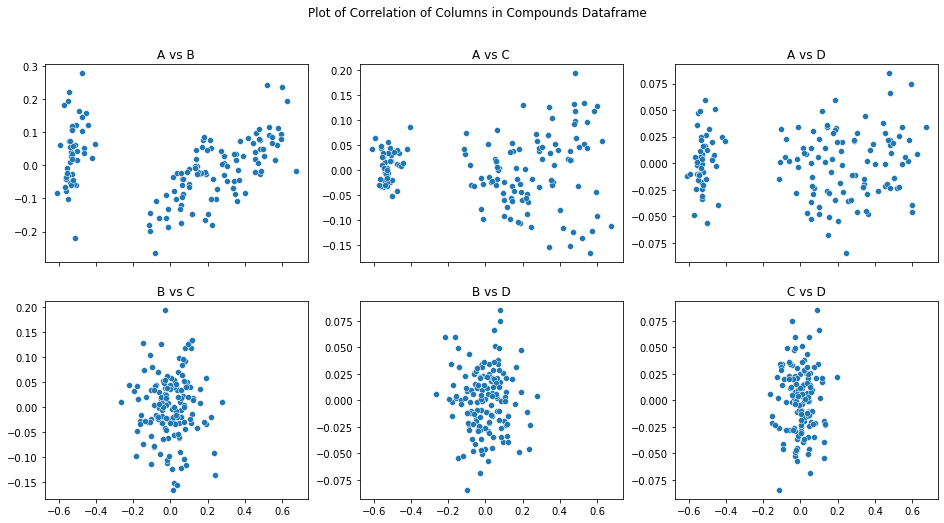

In [5]:
import seaborn as sns
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
fig.suptitle('Plot of Correlation of Columns in Compounds Dataframe')

sns.scatterplot(ax=axes[0, 0], x=x_pca[:, 0], y=x_pca[:, 1])
axes[0, 0].set_title("A vs B")

sns.scatterplot(ax=axes[0, 1], x=x_pca[:, 0], y=x_pca[:, 2])
axes[0, 1].set_title("A vs C")

sns.scatterplot(ax=axes[0, 2], x=x_pca[:, 0], y=x_pca[:, 3])
axes[0, 2].set_title("A vs D")

sns.scatterplot(ax=axes[1, 0], x=x_pca[:, 1], y=x_pca[:, 2])
axes[1, 0].set_title("B vs C")

sns.scatterplot(ax=axes[1, 1], x=x_pca[:, 1], y=x_pca[:, 3])
axes[1, 1].set_title("B vs D")

sns.scatterplot(ax=axes[1, 2], x=x_pca[:, 2], y=x_pca[:, 3])
axes[1, 2].set_title("C vs D")

It looks like plotting column A against the other columns results in a chart that could be separated into groups by kmeans clustering or DBscan. Plotting B versus C or D results in a group that may be harder to cluster, but it shows that the features are correlated, as well as plotting C versus D.

### (B)

Use Kmeans clustering with K=1, 2, 4 and report the groupings.

In [6]:
import warnings

class KMeans():
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ Do KMeans clustering
        input_points: np.array shape(ndata,nfeatures). 
            Each feature is assumed to be normalized within range of [0,1]
        """
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros_like(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        if len(np.unique(new_assignments))<self.K:
            return self.cluster(input_points)
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            #print("n_iter", n_iters)
            #print("new assignments", new_assignments.shape)
            centroids = np.zeros((self.K, input_points.shape[1]))
            for c in range(self.K):
                arr = []
                for i in range(new_assignments.shape[0]):
                    if (new_assignments[i] == c):
                        arr.append(input_points[i])
                arr = np.array(arr)
                centroids[c][:] = np.mean(arr, axis = 0)
            #print(centroids)
            #print("centroids = ", centroids.shape)
            assignments = new_assignments
            ### Update the assignment with current centroids ###
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)
        #distances = np.linalg.norm(data_points, centroids, axis = 1)
        #print(centroids.shape)
        #print(data_points.shape)
        distances = np.zeros((data_points.shape[0], centroids.shape[0]))
        for element in range(data_points.shape[0]):
            for k in range(centroids.shape[0]):
                distances[element, k] = np.linalg.norm(data_points[element, :] - centroids[k, :])
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments
        
   

[1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1
 1 1]


<AxesSubplot:xlabel='A', ylabel='B'>

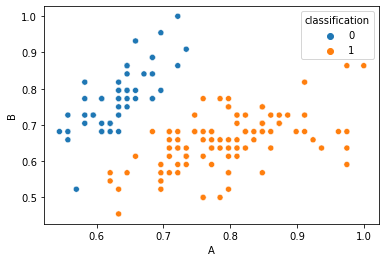

In [7]:
np.random.seed(0)

input = X.to_numpy()
k_2 = KMeans(2, 100)
cluster_by_2 = k_2.cluster(input)
print(cluster_by_2)
X['classification'] = cluster_by_2

sns.scatterplot(data = X, x='A', y='B', hue = 'classification')

[2 0 1 1 1 0 2 1 2 1 2 1 0 1 0 0 1 1 2 0 0 1 2 1 0 1 0 0 0 1 1 0 1 0 2 2 0
 1 2 0 2 2 1 1 0 2 1 1 1 1 0 2 1 1 1 2 1 2 1 0 0 2 0 2 1 0 2 0 2 2 0 0 2 1
 2 0 1 2 2 2 2 0 0 2 1 2 2 2 2 2 2 1 0 0 0 0 1 1 1 0 2 2 2 2 2 0 0 0 0 2 1
 0 0 2 2 1 0 0 0 1 0 0 0 2 1 1 1 2 1 0 1 2 1 2 1 1 0 2 0 2 1 0 2 0 2 0 1 2
 2 2]


Text(0.5, 1.0, 'A vs B')

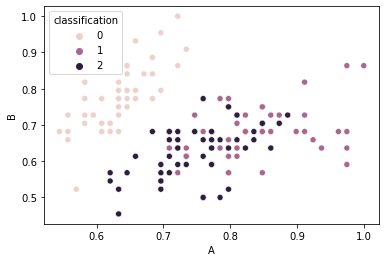

In [8]:
k_3 = KMeans(3, 100)
cluster_by_3 = k_3.cluster(input)
print(cluster_by_3)

X['classification'] = cluster_by_3

sns.scatterplot(data = X, x='A', y='B', hue = 'classification')
axes[0, 0].set_title("A vs B")

[3 0 2 2 2 1 3 2 3 2 3 2 0 2 1 1 2 2 3 1 0 2 3 2 0 2 1 1 0 2 2 0 2 0 3 3 1
 2 3 1 3 3 2 2 0 3 2 2 2 2 1 3 2 2 2 3 2 3 2 1 1 3 1 3 2 0 3 0 3 3 0 0 3 2
 3 1 2 3 3 3 3 1 0 3 2 3 3 3 3 3 3 2 0 1 0 0 2 2 2 0 3 3 3 3 3 1 1 0 0 3 2
 1 0 3 3 2 1 0 0 2 0 0 1 3 2 2 2 3 2 1 2 3 2 3 2 2 1 3 0 3 2 1 3 1 3 0 2 3
 3 3]


Text(0.5, 1.0, 'A vs B')

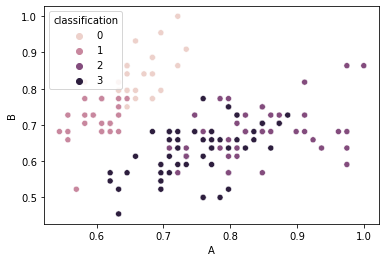

In [9]:
k_4 = KMeans(4, 100)
cluster_by_4 = k_4.cluster(input)
print(cluster_by_4)

X['classification'] = cluster_by_4

sns.scatterplot(data = X, x='A', y='B', hue = 'classification')
axes[0, 0].set_title("A vs B")

By plotting the features A against features B we can see two main groups of points but the clustering algorithm uses a centroid in higher dimensions than 2D, so the groups we see in the chart are not the groups determined by the clustering algorithm. From the three charts above, it seems that clustering by 2 and by 3 are fairly good approximations, and I imagine that the points are well grouped if we could view them in higher dimensions. Using K=4 results in groupings that are hard to discern based on the 2D plot so it is harder to see if the clustering was effective.

### (C)

Use K=3 and compare the predictions to the ground truth values.

In [10]:
def validate(y_hat,y):
    """print accuracy of prediction for each class for the compounds dataset
    yhat: np.array shape(ndata). Your prediction of classes
    y: np.array of str shape(ndata). data labels / groudn truths.
    """
    # correct classification
    compounds = np.unique(y) # should be ['amide','phenol','ether'] for compounds dataset
    clusters =[np.where((y==c)) for c in compounds]
    pred_class = np.unique(y_hat)
    
    #remove -1 for noise point in DBSCAN
    pred_class= np.delete(pred_class,np.where(pred_class==-1))
    assert len(pred_class) == len(compounds), f'y_hat has less or more than {len(compounds)} classes:{pred_class}'

    for i in range(3):
        #loop over solutions
        counts=[]
        scores=[]
        for j in range(3):
            #loop over clusters of true assignments
            sol_i= np.where((y_hat==pred_class[i]))
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1]/len(clusters[j]))
        idx = np.argmax(scores)
        print(f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out \
of {np.count_nonzero(clusters[idx])} are classified correctly')

In [11]:
y = df['type'].to_numpy()
validate(cluster_by_3, y)

Class 0 - phenol: 50 out of 50 are classified correctly
Class 1 - ether: 46 out of 50 are classified correctly
Class 2 - amide: 48 out of 49 are classified correctly


When we know that the true number of clusters is 3, we can validate the prediction and in this case it turns out to be very accurate, classifying almost every compound to the correct class of ether, amide, or phenol.

### (D)

Remove the line which reinitializes the intitial centroid if the first centroid is not good and compare the results by running Kmeans with K = 4.

In [12]:
import warnings

class KMeans_2():
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ Do KMeans clustering
        input_points: np.array shape(ndata,nfeatures). 
            Each feature is assumed to be normalized within range of [0,1]
        """
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros_like(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)
        
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        #if len(np.unique(new_assignments))<self.K:
            #return self.cluster(input_points)
        
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            #print("n_iter", n_iters)
            #print("new assignments", new_assignments.shape)
            centroids = np.zeros((self.K, input_points.shape[1]))
            for c in range(self.K):
                arr = []
                for i in range(new_assignments.shape[0]):
                    if (new_assignments[i] == c):
                        arr.append(input_points[i])
                arr = np.array(arr)
                centroids[c][:] = np.mean(arr, axis = 0)
            #print(centroids)
            #print("centroids = ", centroids.shape)
            assignments = new_assignments
            ### Update the assignment with current centroids ###
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)
        #distances = np.linalg.norm(data_points, centroids, axis = 1)
        #print(centroids.shape)
        #print(data_points.shape)
        distances = np.zeros((data_points.shape[0], centroids.shape[0]))
        for element in range(data_points.shape[0]):
            for k in range(centroids.shape[0]):
                distances[element, k] = np.linalg.norm(data_points[element, :] - centroids[k, :])
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments
        
   

In [13]:
k = KMeans_2(4, 100)
clustering = k.cluster(input)
print(clustering)

/Users/trevor/opt/miniconda3/envs/msse-python/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/trevor/opt/miniconda3/envs/msse-python/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-12-56f44d79895e>:43: UserWarning: At least one centroid vanishes
  warnings.warn('At least one centroid vanishes')


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


The updated KMeans object seems to report all compounds as the same classification and the cluster() function returns an error because at least one of the centroids vanishes. The problem occurs when the initial centroids vector is located in a place which results in less than 4 classes when the compounds are assigned to the closest centroid in the function create_new_assignments. So, when the new centroids are calculated, at least one of the classifications is not represented in the centroid vector, and so the new classification does not assign any compounds to that cluster. The original KMeans class fixes this by making sure that all four classifications are present in the vector new_assignments.

# Problem 2
### (A)

Use DBScan to classify the dataset.

Number of Core Points =  134
Number of Border Points =  5
Number of Noisy Points =  11
Labels:  [ 0  1  0 -1  0  1 -1  0  0  0  0 -1  1  0  1  1  0  0  0  1  1  0  0  0
  1  0  1  1  1  0  2  1  0  1  0  0  1  0  0  1  0  0 -1  0  1  0  0  0
  0  2 -1  0  0 -1  0  0  2  0  0  1  1  0  1  0  0  1  0  1  0  0  1  1
  0  0  0  1  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0 -1  1  1  1  1
  0  0  0  1  0  0  0  0  0  1  1  1  1  0 -1  1  1  0  0  0  1  1  1  2
  1  1  1  0 -1 -1  0  0  0  1  0  0  0  0  0 -1  1  0  1  0  0  1  0  1
  0  1  0  0  0  0]


Text(0.5, 1.0, 'A vs D')

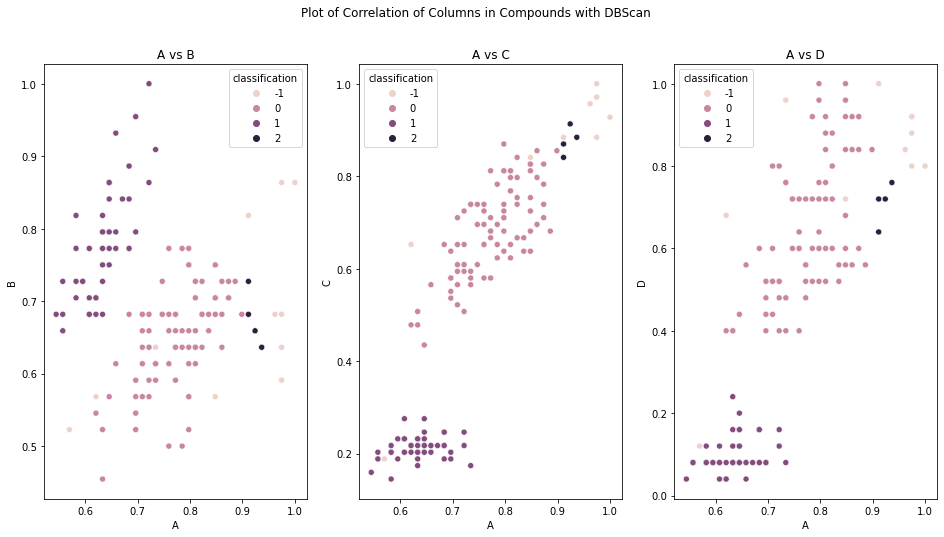

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=3)
clustering = db.fit(input)
# Cluster labels for each point in the dataset given to fit().  Noisy samples are given the label -1.
clustering.labels_
# Indices of core samples.
print("Number of Core Points = ", len(clustering.core_sample_indices_))
print("Number of Border Points = ", len(clustering.labels_) - (np.sum(clustering.labels_ == -1) + len(clustering.core_sample_indices_)))
print("Number of Noisy Points = ", np.sum(clustering.labels_ == -1))
print("Labels: ", clustering.labels_)

X['classification'] = clustering.labels_

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16,8))
fig.suptitle('Plot of Correlation of Columns in Compounds with DBScan')

sns.scatterplot(ax = axes[0], data = X, x='A', y='B', hue = 'classification')
axes[0].set_title("A vs B")

sns.scatterplot(ax = axes[1], data = X, x='A', y='C', hue = 'classification')
axes[1].set_title("A vs C")

sns.scatterplot(ax = axes[2], data = X, x='A', y='D', hue = 'classification')
axes[2].set_title("A vs D")

I found the values for the hyperparameters that resulted in three clusters, but judging by the visualization it looks like two clusters is a good approximation of the groupings in the data set. We can use the validate function to see how good the clustering was based on the given ground truth data. DBScan is effective if there were only two groups but because the third group is not easily separable from the other two, it does poorly at classifying the ether compounds, and is more likely to assign them to other groups. I would imagine that more experiments with different hyperparameters could result in a more effective clustering.

In [15]:
y = df['type'].to_numpy()
validate(clustering.labels_, y)

Class 0 - amide: 50 out of 49 are classified correctly
Class 1 - phenol: 49 out of 50 are classified correctly
Class 2 - ether: 4 out of 50 are classified correctly


### (B)
Use the noisy moons dataset with DBScan and Kmeans/

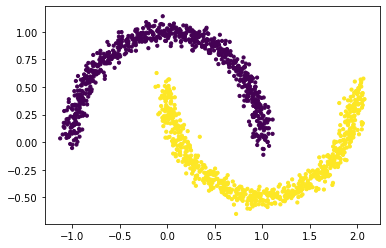

In [16]:
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pylab import *

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
# print(noisy_moons)
X,y=noisy_moons
plt.scatter(X[:, 0], X[:, 1], s=10,c=y)

[0 1 0 ... 0 0 1]


<AxesSubplot:>

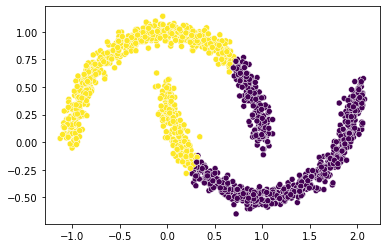

In [17]:
k = KMeans(2, 100)
input = np.array(X)
clustering = k.cluster(input)
print(clustering)


sns.scatterplot(x = X[:, 0], y = X[:, 1], c = clustering)

[0 1 1 ... 0 0 0]


<AxesSubplot:>

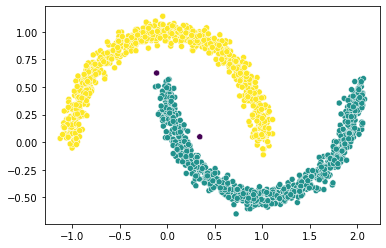

In [18]:
db = DBSCAN(eps=0.1, min_samples=3)
clustering = db.fit(X)
print(clustering.labels_)

sns.scatterplot(x = X[:, 0], y = X[:, 1], c = clustering.labels_)

DBscan is more effective that Kmeans for the noisy moon dataset, mostly because of the shape of the data. KMeans will result in two groups that are centered around two centroids, which does not distinguish between border points, core points, and noisy points, which DBScan does. That is why DBScan can effectively group the data into the two clusters that we see in the visualization.